### Random Forest

In [1]:
loan <- readRDS(file="loan_updated.Rda")

In [2]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [3]:
# split data into train and test for model performance
set.seed(1)
train.ind <- sample(1:dim(loan)[1], 0.7 * dim(loan)[1])
train <- loan[train.ind, ]
test <- loan[-train.ind, ]
colnames(loan)

[1] "loan_amnt"                  "term"                      
 [3] "int_rate"                   "emp_title"                 
 [5] "emp_length"                 "home_ownership"            
 [7] "annual_inc"                 "issue_d"                   
 [9] "purpose"                    "title"                     
[11] "dti"                        "delinq_2yrs"               
[13] "inq_last_6mths"             "open_acc"                  
[15] "pub_rec"                    "revol_bal"                 
[17] "revol_util"                 "total_acc"                 
[19] "initial_list_status"        "last_credit_pull_d"        
[21] "collections_12_mths_ex_med" "application_type"          
[23] "acc_now_delinq"             "tot_coll_amt"              
[25] "tot_cur_bal"                "total_rev_hi_lim"          
[27] "earliest_cr_line_date"      "earliest_cr_line_year"     
[29] "earliest_cr_line_mon"       "last_credit_pull_d_date"   
[31] "last_credit_pull_d_year"    "last_credit_pull_d_mon"    
[33] "issue_d_date"               "issue_d_year"              
[35] "issue_d_mon"                "last_pymnt_d_date"         
[37] "last_pymnt_d_year"          "last_pymnt_d_mon"          
[39] "emp_length_sim"             "gen_home_ownership"        
[41] "gen_add_state_zip_ave_rate" "gen_log_annual_inc"        
[43] "gen_inq_last_6mths"         "gen_log_tot_cur_bal"       
[45] "gen_log_tot_coll_amt"       "gen_log_total_rev_hi_lim"  
[47] "gen_issue_d"                "gen_issue_year"            
[49] "gen_issue_mon"              "gen_log_loan_amnt"

In [4]:
set.seed(2)
# split data into train and test for model performance
train.sub <- train[, c('int_rate','loan_amnt','term','annual_inc','purpose','dti',
                       'delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal',
                       'revol_util','total_acc','initial_list_status','collections_12_mths_ex_med',
                       'application_type','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim',
                       'emp_length_sim', 'gen_home_ownership','gen_add_state_zip_ave_rate','gen_inq_last_6mths',
                       'gen_issue_year','gen_issue_mon')]

num.NA <- sort(sapply(train.sub, function(x) { sum(is.na(x))} ), decreasing = TRUE)
num.NA

int_rate                  loan_amnt 
                         0                          0 
                      term                 annual_inc 
                         0                          0 
                   purpose                        dti 
                         0                          0 
               delinq_2yrs             inq_last_6mths 
                         0                          0 
                  open_acc                    pub_rec 
                         0                          0 
                 revol_bal                 revol_util 
                         0                          0 
                 total_acc        initial_list_status 
                         0                          0 
collections_12_mths_ex_med           application_type 
                         0                          0 
            acc_now_delinq               tot_coll_amt 
                         0                          0 
               tot_cur_bal           total_rev_hi_lim 
                         0                          0 
            emp_length_sim         gen_home_ownership 
                         0                          0 
gen_add_state_zip_ave_rate         gen_inq_last_6mths 
                         0                          0 
            gen_issue_year              gen_issue_mon 
                         0                          0

In [5]:
# Categorical featues need to be factors when using randomForest
train.sub$term <- as.factor(train.sub$term)
train.sub$purpose <- as.factor(train.sub$purpose)
train.sub$initial_list_status <- as.factor(train.sub$initial_list_status)
train.sub$application_type <- as.factor(train.sub$application_type)
train.sub$emp_length_sim <- as.factor(train.sub$emp_length_sim)
train.sub$gen_home_ownership <- as.factor(train.sub$gen_home_ownership)

In [6]:
save(train.sub,file='train_rf.Rdata')

In [7]:
rf <- randomForest(x = train.sub[, -1], y = train.sub[, 1], importance = TRUE,
                   do.trace = TRUE, nodesize = 6200, ntree = 100)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
   1 |    12.19    63.48 |
   2 |    11.85    61.68 |
   3 |    11.86    61.73 |
   4 |    11.67    60.74 |
   5 |    11.57    60.25 |
   6 |    11.46    59.65 |
   7 |    11.33    58.98 |
   8 |    11.24    58.52 |
   9 |    11.16    58.10 |
  10 |    11.11    57.84 |
  11 |    11.06    57.58 |
  12 |    11.03    57.43 |
  13 |    10.98    57.17 |
  14 |    10.95    57.00 |
  15 |    10.92    56.84 |
  16 |     10.9    56.73 |
  17 |    10.87    56.60 |
  18 |    10.86    56.53 |
  19 |    10.83    56.38 |
  20 |    10.81    56.29 |
  21 |    10.79    56.17 |
  22 |    10.79    56.15 |
  23 |    10.77    56.08 |
  24 |    10.77    56.06 |
  25 |    10.76    56.03 |
  26 |    10.73    55.88 |
  27 |    10.73    55.84 |
  28 |    10.72    55.78 |
  29 |    10.71    55.76 |
  30 |    10.71    55.75 |
  31 |    10.71    55.74 |
  32 |     10.7    55.70 |
  33 |     10.7    55.68 |
  34 |    10.69    55.67 |
  35 |    10.69    55.67 |
 

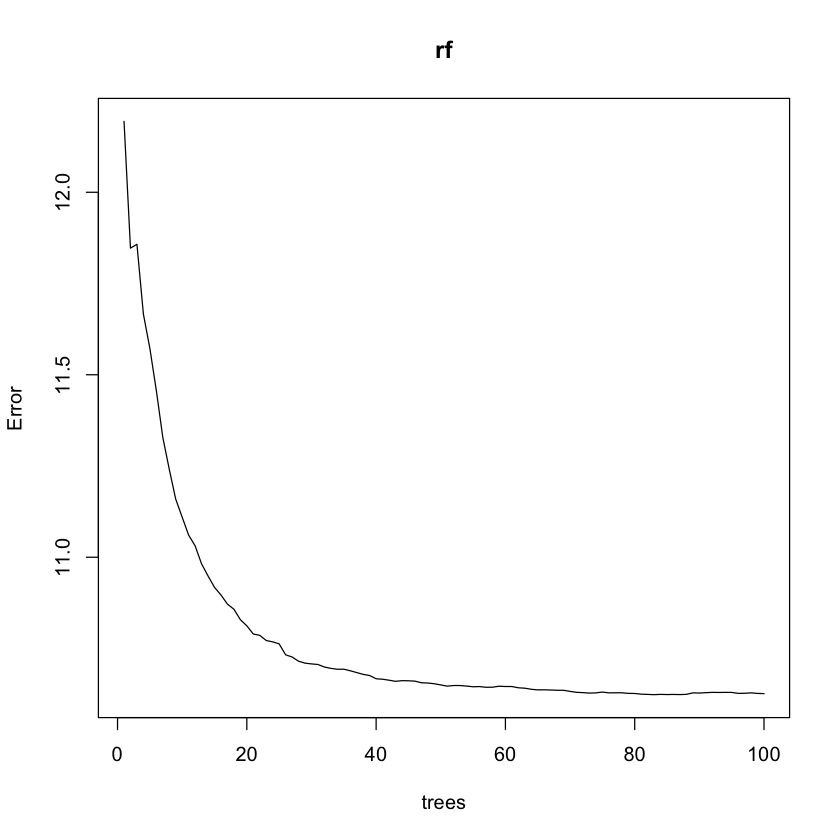

In [8]:
plot(rf)
# see oob error
# Black solid line for overall OOB error. If classification problem, see a bunch of colour lines, one for each class' error
# Can rf get overfitting? Yes.
# Solution: there is also RRF library, or control for how deep the tree could grow,
# say nodesize (Minimum size of terminal nodes) and maxnodes(Maximum number of terminal nodes trees)

[1] 1 1

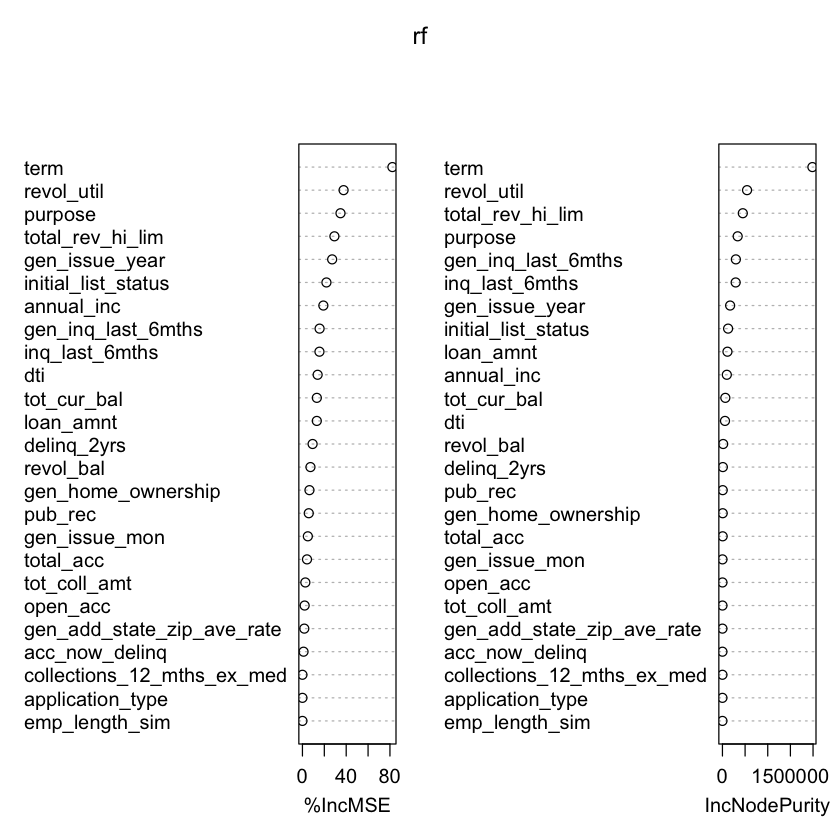

In [9]:
par(mar=rep(2,4)) # change margin in plot setting.
# check the setting in par(), like 
par()$mfrow
par(mfrow = c(1,1))

varImpPlot(rf)
# %IncMSE shows if a variable is assigned values by random permutation, how much will the MSE increase?
# 1 train forest
# 2 measure out-of-bag accuracy -> OOB_acc_base
# 3 permute variable i
# 4 measure out-of-bag accuracy -> OOB_acc_perm_i
# 5 VI_i = - (OOB_acc_perm_i - OOB_acc_base)
# So Higher the value, higher the variable importance.
# IncNodePurity is measured by the difference between sum of squared error before and after the split on that variable.


In [10]:
importance(rf, type = 1) # 2)
# Both accuracy tests to see how worse the model performs without each variable
# The Gini one digs into the mathematics behind decision trees, 
# but essentially measures how pure the nodes are at the end of the tree. 


,%IncMSE
loan_amnt,13.127487
term,82.244418
annual_inc,19.120930
purpose,34.791242
dti,13.885935
delinq_2yrs,9.289011
inq_last_6mths,15.552898
open_acc,2.004075
pub_rec,5.783841
revol_bal,7.324846


In [11]:
importanceOrder= order(rf$importance[, "%IncMSE"], decreasing = T)
names=rownames(rf$importance)[importanceOrder]
names
# partialPlot is interpreted as the predicted value for a particular value of an explanatory variable
# averaged across the observed values of the other predictors. 
# https://cran.r-project.org/web/packages/datarobot/vignettes/PartialDependence.html
# http://zmjones.com/static/papers/rfss_manuscript.pdf
#partialPlot(rf, train.sub, eval('loan_amnt'), xlab='loan_amnt')

[1] "term"                       "revol_util"                
 [3] "total_rev_hi_lim"           "purpose"                   
 [5] "gen_inq_last_6mths"         "inq_last_6mths"            
 [7] "gen_issue_year"             "initial_list_status"       
 [9] "annual_inc"                 "loan_amnt"                 
[11] "tot_cur_bal"                "dti"                       
[13] "revol_bal"                  "delinq_2yrs"               
[15] "pub_rec"                    "gen_home_ownership"        
[17] "total_acc"                  "gen_issue_mon"             
[19] "open_acc"                   "tot_coll_amt"              
[21] "gen_add_state_zip_ave_rate" "acc_now_delinq"            
[23] "collections_12_mths_ex_med" "application_type"          
[25] "emp_length_sim"

In [12]:
# Categorical featues need to be factors when using randomForest
test$term <- as.factor(test$term)
test$purpose <- as.factor(test$purpose)
test$initial_list_status <- as.factor(test$initial_list_status)
test$application_type <- as.factor(test$application_type)
test$emp_length_sim <- as.factor(test$emp_length_sim)
test$gen_home_ownership <- as.factor(test$gen_home_ownership)

In [13]:
test.sub <- test[, c('int_rate','loan_amnt','term','annual_inc','purpose','dti',
                       'delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal',
                       'revol_util','total_acc','initial_list_status','collections_12_mths_ex_med',
                       'application_type','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim',
                       'emp_length_sim', 'gen_home_ownership','gen_add_state_zip_ave_rate','gen_inq_last_6mths',
                       'gen_issue_year','gen_issue_mon')]
pred <- predict(rf, test.sub)
sqrt(sum((pred - test.sub$int_rate)^2) / dim(test.sub)[1]) # 

[1] 3.252963

In [14]:
save(test.sub,file='test_rf.Rdata')

### Boosting Decision Tree model

In [15]:
library(xgboost) 
train.label <- train.sub$int_rate

In [16]:
# Xgboost manages only numeric vectors.
feature.matrix <- model.matrix( ~ ., data = train.sub[, -1]) 
# Remember we removed rows with NA in randomForest fitting. model.matrix will also remove rows with any NA.

In [17]:
set.seed(1)
gbt <- xgboost(data =  feature.matrix, 
               label = train.label, 
               max_depth = 8, # for each tree, how deep it goes
               nround = 100, # number of trees
               objective = "reg:linear",
               nthread = 3,
               verbose = 1)

[1]	train-rmse:9.723909 
[2]	train-rmse:7.188513 
[3]	train-rmse:5.519311 
[4]	train-rmse:4.460348 
[5]	train-rmse:3.810785 
[6]	train-rmse:3.434457 
[7]	train-rmse:3.214464 
[8]	train-rmse:3.091803 
[9]	train-rmse:3.017770 
[10]	train-rmse:2.965128 
[11]	train-rmse:2.933593 
[12]	train-rmse:2.904737 
[13]	train-rmse:2.886584 
[14]	train-rmse:2.869096 
[15]	train-rmse:2.854528 
[16]	train-rmse:2.845739 
[17]	train-rmse:2.835570 
[18]	train-rmse:2.823830 
[19]	train-rmse:2.816844 
[20]	train-rmse:2.802224 
[21]	train-rmse:2.796704 
[22]	train-rmse:2.788396 
[23]	train-rmse:2.784528 
[24]	train-rmse:2.773214 
[25]	train-rmse:2.768086 
[26]	train-rmse:2.762900 
[27]	train-rmse:2.759949 
[28]	train-rmse:2.756203 
[29]	train-rmse:2.751642 
[30]	train-rmse:2.744352 
[31]	train-rmse:2.738527 
[32]	train-rmse:2.735526 
[33]	train-rmse:2.730409 
[34]	train-rmse:2.726613 
[35]	train-rmse:2.724057 
[36]	train-rmse:2.720309 
[37]	train-rmse:2.717294 
[38]	train-rmse:2.709463 
[39]	train-rmse:2.705

In [18]:
test_feature.matrix <- model.matrix( ~ ., data = test.sub[, -1]) 
dtest = xgb.DMatrix(data=test_feature.matrix,label=test.sub$int_rate)
pred <- predict(gbt, dtest)
sqrt(sum((pred - test.sub$int_rate)^2) / dim(test.sub)[1]) # 

[1] 2.709445

In [19]:
importance <- xgb.importance(feature_names = colnames(feature.matrix), model = gbt)
importance
# Gain: contribution of each feature to the model. improvement in accuracy brought by a feature to the branches it is on.
#       For boosted tree model, gain of each feature in each branch of each tree is taken into account, 
#       then average per feature to give a vision of the entire model.
#       Highest percentage means important feature to predict the label used for the training.
# Cover: the number of observation through a branch using this feature as split feature 
# Frequency: counts the number of times a feature is used in all generated trees (often we don't use it).


Feature,Gain,Cover,Frequency
term 60 months,2.783236e-01,1.389034e-02,0.0118086901
total_rev_hi_lim,1.089821e-01,4.114735e-02,0.0672046688
revol_util,9.449657e-02,5.892474e-02,0.0802899740
inq_last_6mths,8.995381e-02,2.859027e-02,0.0285870606
loan_amnt,7.991384e-02,2.661521e-01,0.1318105138
annual_inc,4.399668e-02,5.004889e-02,0.0972963115
purposecredit_card,3.688887e-02,8.935658e-03,0.0121278439
gen_issue_year2015,3.165393e-02,1.212147e-02,0.0170975243
initial_list_statusw,2.791871e-02,1.012814e-02,0.0100761410
tot_cur_bal,2.673621e-02,4.507763e-02,0.0742716455


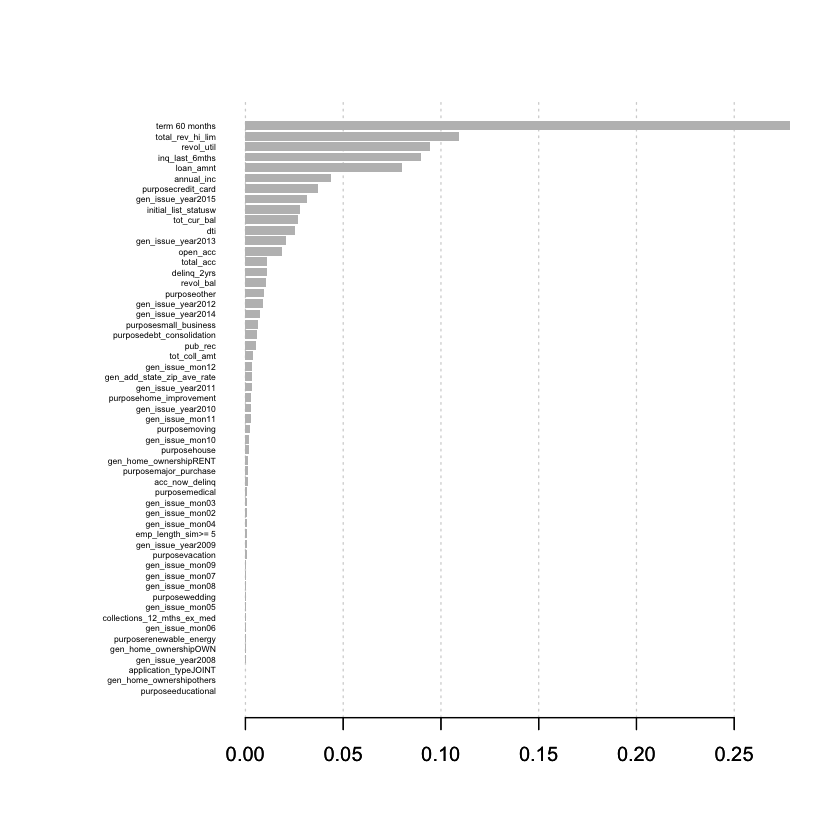

In [20]:
library(Ckmeans.1d.dp)
xgb.plot.importance(importance)

In [21]:
par <- list( max_depth = 8,
             objective = "reg:linear",
             nthread = 3,
             verbose = 2)
gbt.cv <- xgb.cv(params = par,
                 data = feature.matrix, label = train.label,
                 nfold = 5, nrounds = 100)

[1]	train-rmse:9.723848+0.001611	test-rmse:9.726231+0.009012 
[2]	train-rmse:7.188527+0.001459	test-rmse:7.193404+0.008515 
[3]	train-rmse:5.519627+0.001248	test-rmse:5.528236+0.008595 
[4]	train-rmse:4.459761+0.001610	test-rmse:4.473656+0.007748 
[5]	train-rmse:3.813675+0.002587	test-rmse:3.832119+0.007935 
[6]	train-rmse:3.436088+0.002664	test-rmse:3.459561+0.005824 
[7]	train-rmse:3.219952+0.002817	test-rmse:3.248168+0.004291 
[8]	train-rmse:3.094438+0.002751	test-rmse:3.126554+0.002385 
[9]	train-rmse:3.014645+0.002381	test-rmse:3.050066+0.003204 
[10]	train-rmse:2.966409+0.003088	test-rmse:3.004669+0.002930 
[11]	train-rmse:2.931371+0.005796	test-rmse:2.972476+0.003455 
[12]	train-rmse:2.905407+0.003063	test-rmse:2.948981+0.002193 
[13]	train-rmse:2.884287+0.005212	test-rmse:2.930033+0.003541 
[14]	train-rmse:2.867642+0.006383	test-rmse:2.915722+0.006159 
[15]	train-rmse:2.854198+0.005688	test-rmse:2.904431+0.005404 
[16]	train-rmse:2.840997+0.005916	test-rmse:2.893383+0.005256 
[

[1] 100

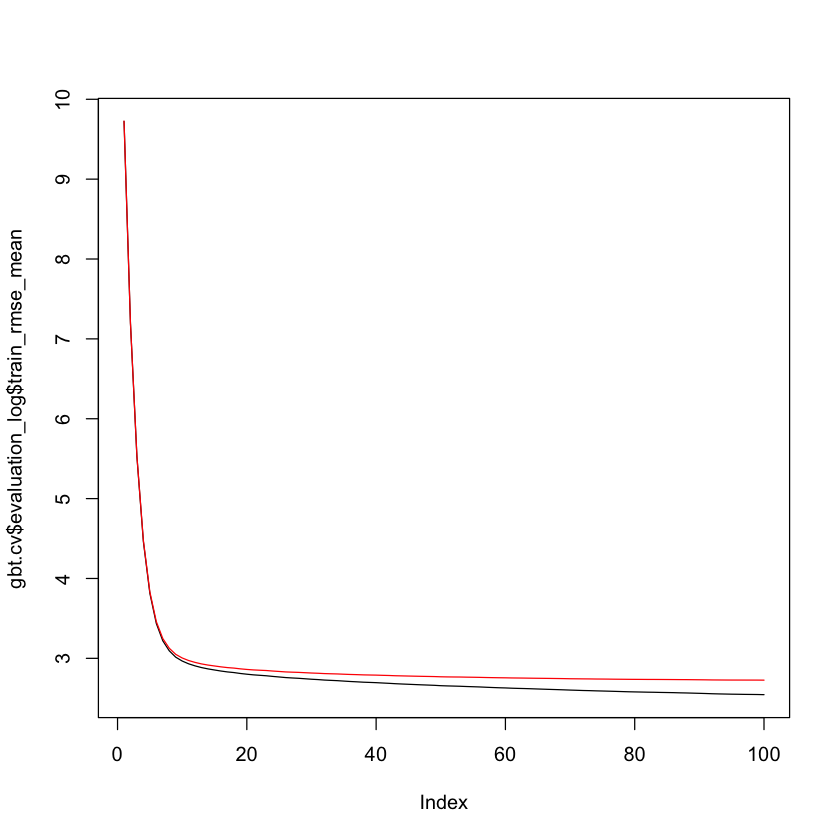

In [22]:
plot(gbt.cv$evaluation_log$train_rmse_mean, type = 'l')
lines(gbt.cv$evaluation_log$test_rmse_mean, col = 'red')
nround = which(gbt.cv$evaluation_log$test_rmse_mean == 
                 min(gbt.cv$evaluation_log$test_rmse_mean))
nround

In [27]:
# Grid search for best parameters
all_param = NULL
all_test_rmse = NULL
all_train_rmse = NULL
best_param=list()
best_rmse=Inf
best_rmse_index=0
best_seednumber=1
for (iter in 1:20) {
  print(iter)
  param <- list(objective = "reg:linear",
                max_depth = sample(5:12, 1), 
                subsample = runif(1, .6, .9)
                #   eta = runif(1, .01, .3)
                #  gamma = runif(1, 0.0, 0.2),
                #  colsample_bytree = runif(1, .5, .8), 
                #  min_child_weight = sample(1:40, 1),
                #  max_delta_step = sample(1:10, 1)
  )
  cv.nround = 100
  cv.nfold = 5
  set.seed(iter)
  mdcv <- xgb.cv(data=feature.matrix, label = train.label, params = param, 
                 nfold=cv.nfold, nrounds=cv.nround,
                 verbose = T, # early_stop_round=8, 
                 maximize = FALSE)
  min_train_rmse = min(mdcv$evaluation_log$train_rmse_mean)
  min_test_rmse = min(mdcv$evaluation_log$test_rmse_mean)
  min_rmse_index=which.min(mdcv$evaluation_log$test_rmse_mean)
    
  all_param <- rbind(all_param, unlist(param)[-1])
  all_train_rmse <- c(all_train_rmse, min_train_rmse)
  all_test_rmse <- c(all_test_rmse, min_test_rmse)
  
  if (min_test_rmse < best_rmse) {
      best_rmse=min_test_rmse
      best_rmse_index=min_rmse_index
      best_seednumber=iter
      best_param=param
  }
}


[1] 1
[1]	train-rmse:9.701160+0.001790	test-rmse:9.710076+0.009597 
[2]	train-rmse:7.135084+0.001262	test-rmse:7.161334+0.010058 
[3]	train-rmse:5.425904+0.001613	test-rmse:5.477261+0.010210 
[4]	train-rmse:4.322794+0.003117	test-rmse:4.406716+0.008257 
[5]	train-rmse:3.638643+0.002951	test-rmse:3.756239+0.008567 
[6]	train-rmse:3.226596+0.002953	test-rmse:3.378212+0.007209 
[7]	train-rmse:2.978855+0.003631	test-rmse:3.161396+0.005836 
[8]	train-rmse:2.839183+0.003875	test-rmse:3.043123+0.005962 
[9]	train-rmse:2.750495+0.010190	test-rmse:2.972837+0.008779 
[10]	train-rmse:2.688594+0.008922	test-rmse:2.929682+0.009224 
[11]	train-rmse:2.652755+0.008618	test-rmse:2.905731+0.009065 
[12]	train-rmse:2.621825+0.008734	test-rmse:2.887538+0.009380 
[13]	train-rmse:2.593538+0.009061	test-rmse:2.871789+0.008181 
[14]	train-rmse:2.576199+0.010698	test-rmse:2.862946+0.007844 
[15]	train-rmse:2.556468+0.009169	test-rmse:2.853847+0.007175 
[16]	train-rmse:2.544385+0.009129	test-rmse:2.848241+0.007

In [29]:
best_param

$objective
[1] "reg:linear"

$max_depth
[1] 9

$subsample
[1] 0.8115327

In [30]:
nround=best_rmse_index
set.seed(best_seednumber)
gbt_best <- xgboost(data=feature.matrix, label = train.label, 
                    objective = "reg:linear",max_depth = 9, subsample = 0.811532687419094, 
                    nrounds=nround, nthread = 3)

[1]	train-rmse:9.716188 
[2]	train-rmse:7.172955 
[3]	train-rmse:5.492719 
[4]	train-rmse:4.426007 
[5]	train-rmse:3.778545 
[6]	train-rmse:3.392515 
[7]	train-rmse:3.173958 
[8]	train-rmse:3.048759 
[9]	train-rmse:2.975380 
[10]	train-rmse:2.928788 
[11]	train-rmse:2.891675 
[12]	train-rmse:2.867995 
[13]	train-rmse:2.850933 
[14]	train-rmse:2.829630 
[15]	train-rmse:2.816330 
[16]	train-rmse:2.807379 
[17]	train-rmse:2.792040 
[18]	train-rmse:2.779701 
[19]	train-rmse:2.773888 
[20]	train-rmse:2.758334 
[21]	train-rmse:2.752606 
[22]	train-rmse:2.742317 
[23]	train-rmse:2.734726 
[24]	train-rmse:2.728081 
[25]	train-rmse:2.723079 
[26]	train-rmse:2.718801 
[27]	train-rmse:2.714884 
[28]	train-rmse:2.710492 
[29]	train-rmse:2.703606 
[30]	train-rmse:2.694302 
[31]	train-rmse:2.687032 
[32]	train-rmse:2.684024 
[33]	train-rmse:2.680288 
[34]	train-rmse:2.674652 
[35]	train-rmse:2.670641 
[36]	train-rmse:2.668115 
[37]	train-rmse:2.663543 
[38]	train-rmse:2.654965 
[39]	train-rmse:2.652

In [31]:
test_feature.matrix <- model.matrix( ~ ., data = test.sub[, -1]) 
dtest = xgb.DMatrix(data=test_feature.matrix,label=test.sub$int_rate)
pred <- predict(gbt_best, dtest)
sqrt(sum((pred - test.sub$int_rate)^2) / dim(test.sub)[1]) # 

[1] 2.72126